In [7]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Compute therorical profiles
x=np.linspace(0.1,100000,1000000)
yp=x

#Laminar
up=yp
#Low-law
up1=(1.0/0.41)*np.log(yp)+5.0


In [10]:
#load cfl3d data at x=1.90334
data = np.loadtxt("CFL3D_X2.txt",skiprows=2)

#Antilogarithm of input data
al=10**data[:,0]

In [11]:
#Load openfoam data
data1 = np.loadtxt("../postProcessing/sampleDict/2000/profile0_U_wallShearStress.xy",skiprows=0)


In [12]:
#Input values
U = 1
nu = 2.44e-7
rho = 1

In [13]:
#Compute wall shear stress magnitude and velocity magnitude
#Shear stress units is in pascal must multiply by density in incompressible flows

ws = np.sqrt(data1[:,4]**2 + data1[:,5]**2 + data1[:,6]**2)
um = np.sqrt(data1[:,1]**2 + data1[:,2]**2 + data1[:,3]**2)

#Shear stress at the cell next to the wall
wsm=np.abs(ws[0])

utau=np.sqrt(wsm/rho)
ypn=utau*data1[:,0]/nu
upn=um/utau

In [14]:
#wsm

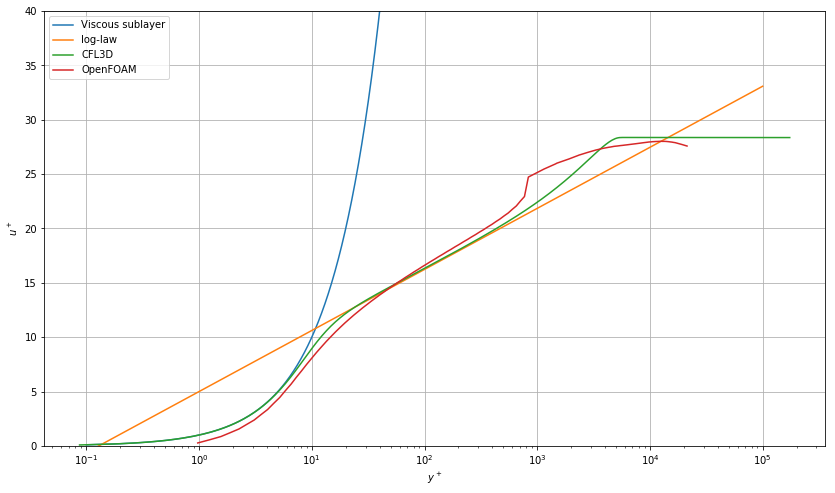

In [15]:
#Plot profiles

plt.figure(figsize=(14, 8))

#Correlations
plt.plot(yp,up,label='Viscous sublayer')
plt.plot(yp,up1,label='log-law')

#cfl3d
#plt.plot(ypn,upn,'-o',ms=6)
plt.plot(al,data[:,1],'-',label='CFL3D')

#OpenFOAM
#plt.plot(ypn[0:],upn[0:],'-o',label='OpenFOAM')
#plt.plot(ypn[1:],upn[1:],'-o', ms=5, label='OpenFOAM')
plt.plot(ypn[1:],upn[1:],'-', label='OpenFOAM')

plt.xlabel('$y^+$')
plt.ylabel('$u^+$')

plt.xscale('log')
#plt.xlim(0.1,100000)
plt.ylim(0,40)

plt.grid()
plt.legend(loc=2)

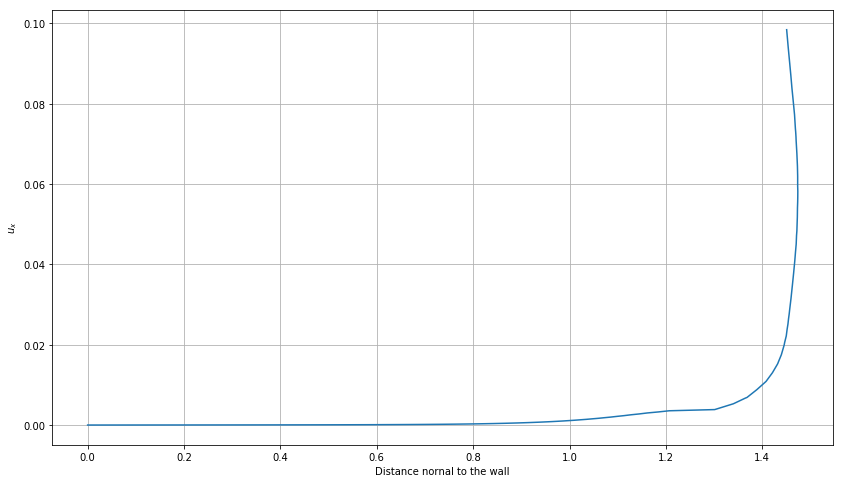

In [16]:
#Plot profiles

plt.figure(figsize=(14, 8))

#OpenFOAM
#plt.plot(ypn[0:],upn[0:],'-o',label='OpenFOAM')
plt.plot(data1[:,1],data1[:,0],'-', ms=5, label='OpenFOAM')

#plt.xscale('log')
#plt.xlim(0.1,100000)
#plt.ylim(0,40)

plt.xlabel('Distance nornal to the wall')
plt.ylabel('$u_x$')

plt.grid()
#plt.legend(loc=2)